Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3
[2.243640661239624, 2.62972354888916, 2.660825252532959, 2.3880045413970947]
2.4805485010147095


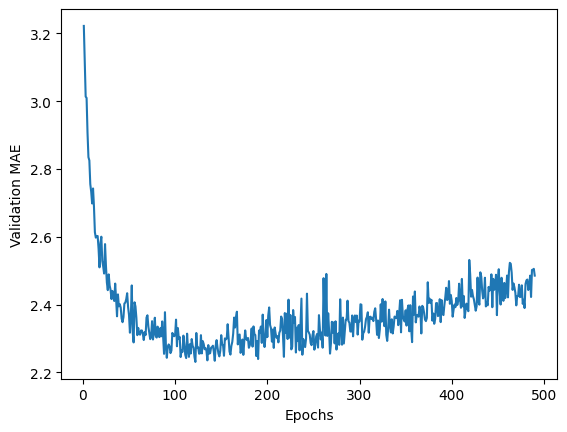

In [20]:
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# 60,000 samples, each a 28x28 matrix. Each one correponds to a label 0-9
# not a lot of data, we can perform a 5-fold validation 

# randomize order of data, to obtain better distribution 
random_indices = np.random.permutation(len(train_images))
train_images = train_images[random_indices]
train_labels = train_labels[random_indices]

# pre-process data into 2D arrays, each value is from 0-1 instead of 0-255. 
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

# model
def build_model():
  model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
  ])

  model.compile(optimizer="rmsprop",
                loss="mse",
                metrics=["mae"])
  return model

k = 5
num_val_samples = len(train_images) // k 
num_epochs = 10
all_accuracy_histories = []

for i in range(k):
  print(f"Processing fold #{i+1}")
  validation_data = train_images[i * num_val_samples: (i + 1) * num_val_samples] 
  validation_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples] 

  training_data = np.concatenate(
    [train_images[:i * num_val_samples], 
    train_images[(i + 1) * num_val_samples:]],
    axis=0)
  
  training_labels = np.concatenate(
    [train_labels[:i * num_val_samples], 
      train_labels[(i + 1) * num_val_samples:]],
    axis=0)
  
  model = build_model()
 
  history = model.fit(training_data,
                      training_labels,
                      epochs=num_epochs,
                      batch_size = 32,
                      validation_data=(validation_data, validation_labels))
  
    
  accuracy_history = history.history["val_accuracy"]
  all_accuracy_histories.append(accuracy_history)

  loss_of_model, accuracy_of_model = model.evaluate(test_images, test_labels)
  loss_history.append(loss_of_model)

print(loss_history)
print(np.mean(loss_history))

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

truncated_mae_history = average_mae_history[10:] # first 10 skew graph
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()